In [197]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from xgboost import XGBClassifier


In [198]:
hd = pd.read_csv('heart.csv')
hd

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [199]:
XX = hd.drop(columns='target',axis=1)
yy = hd['target'].values

XX_train, XX_test, yy_train, yy_test = train_test_split(XX,yy, test_size=0.33, random_state=5)

scaler = MinMaxScaler()   # instantiate the MinMaxScaler object
scaler.fit(XX_train)       # "fit" scaler object for XX_train.
XX_train_scaled = scaler.transform(XX_train)  # apply scaling to XX_train
XX_test_scaled  = scaler.transform(XX_test)   # apply *same* scaling to XX_test


model = keras.Sequential()
model.add(keras.layers.Dense(50,activation='relu'))         # our (single) hidden layer
#model.add(keras.layers.Dense(50,activation='relu'))  
#model.add(keras.layers.Dense(50,activation='relu'))
#model.add(keras.layers.Dense(50,activation='relu'))
#model.add(keras.layers.Dense(50,activation='relu'))

model.add(keras.layers.Dense(1,activation='sigmoid'))
#model.compile(optimizer='rmsprop',loss='binary_crossentropy')   # compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(XX_train_scaled, yy_train, batch_size=20,
                    epochs=500, validation_data=(XX_test_scaled, yy_test))

Epoch 1/500
11/11 [==============================] - 1s 29ms/step - loss: 0.2352 - accuracy: 0.6405 - val_loss: 0.2242 - val_accuracy: 0.7400
Epoch 2/500
11/11 [==============================] - 0s 6ms/step - loss: 0.2264 - accuracy: 0.6859 - val_loss: 0.2122 - val_accuracy: 0.8000
Epoch 3/500
11/11 [==============================] - 0s 6ms/step - loss: 0.2173 - accuracy: 0.7171 - val_loss: 0.2001 - val_accuracy: 0.8100
Epoch 4/500
11/11 [==============================] - 0s 5ms/step - loss: 0.2058 - accuracy: 0.7686 - val_loss: 0.1890 - val_accuracy: 0.8500
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 0.1951 - accuracy: 0.8132 - val_loss: 0.1804 - val_accuracy: 0.8500
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 0.1914 - accuracy: 0.7599 - val_loss: 0.1717 - val_accuracy: 0.8600
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1823 - accuracy: 0.7941 - val_loss: 0.1623 - val_accuracy: 0.8600
Epoch 8/500


In [200]:
XX_test_scaled  = scaler.transform(XX_test)   # apply *same* scaling to X_test
yy_test_predict = model.predict(XX_test_scaled)

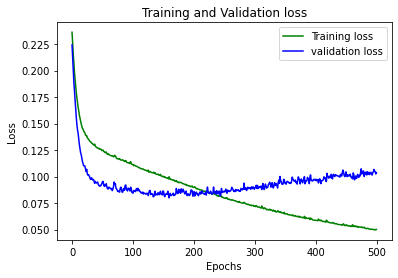

In [201]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(500)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

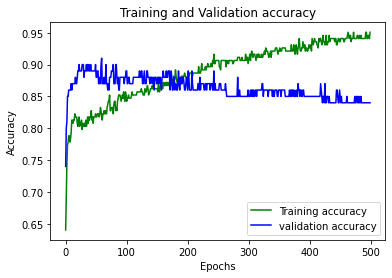

In [202]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(500)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [203]:
from sklearn import metrics

print('Precision de the accuracy:',metrics.accuracy_score(yy_test,yy_test_predict.round())*100,'%')

Precision de the accuracy: 84.0 %


In [204]:
confusion_matrix = metrics.confusion_matrix(yy_test, yy_test_predict.round())
confusion_matrix

array([[39,  7],
       [ 9, 45]], dtype=int64)

<Figure size 432x288 with 0 Axes>

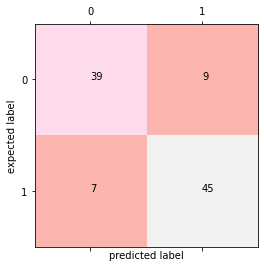

In [205]:
plt.figure()
plt.matshow(confusion_matrix, cmap='Pastel1')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [206]:
# [row, column]
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificy  : %.4f" % (TN / float(TN + FP)))


Sensitivity: 0.8333
Specificy  : 0.8478


In [207]:
print(metrics.classification_report(yy_test, yy_test_predict.round()))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        46
           1       0.87      0.83      0.85        54

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [211]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='gbtree', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(XX_train, yy_train)
xgb_predicted = xgb.predict(XX_test)
xgb_conf_matrix = metrics.confusion_matrix(yy_test, xgb_predicted.round())
xgb_acc_score = metrics.accuracy_score(yy_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(metrics.classification_report(yy_test,xgb_predicted))

confussion matrix
[[39  7]
 [ 5 49]]


Accuracy of Extreme Gradient Boost: 88.0 

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        46
           1       0.88      0.91      0.89        54

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



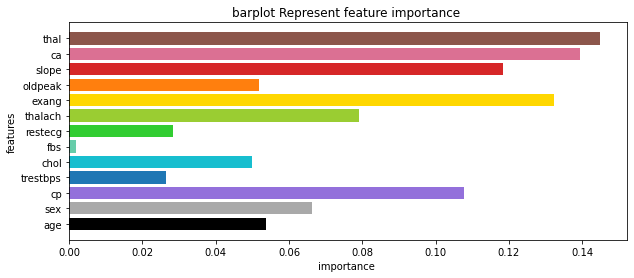

In [212]:
xgb
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color= ['black','darkgray','mediumpurple', '#1f77b4','#17becf','mediumaquamarine','limegreen','yellowgreen', 'gold', '#ff7f0e',  '#d62728', 'palevioletred','#8c564b'])
plt.show()